<a href="https://colab.research.google.com/github/k-messick/clustering/blob/main/assignment_clustering_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1.

In [23]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) #Set the seed for replicability
    #Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    #Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2.

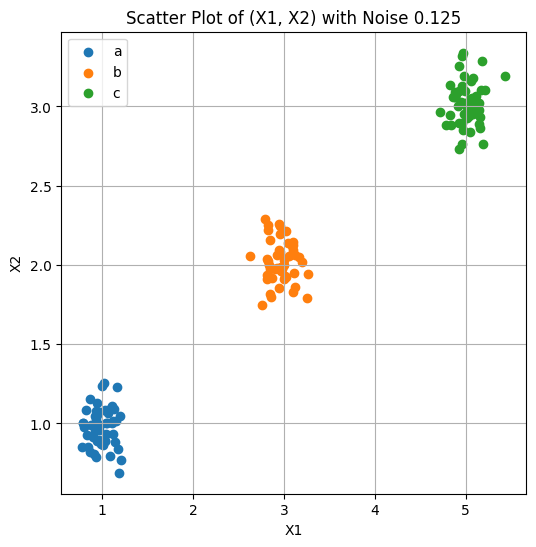

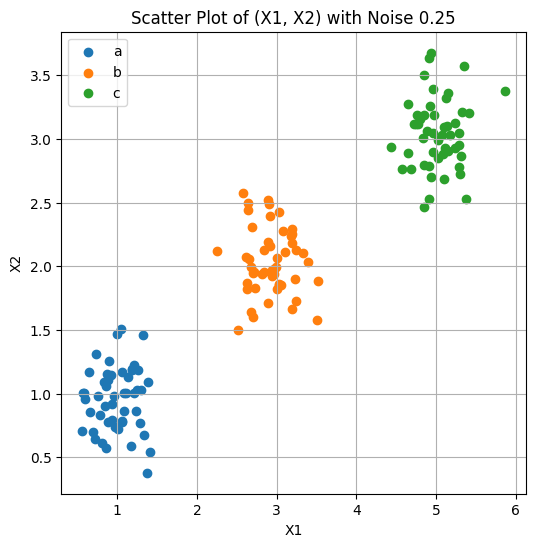

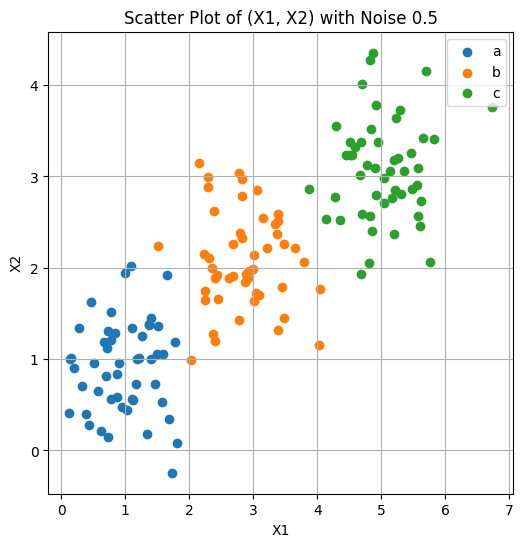

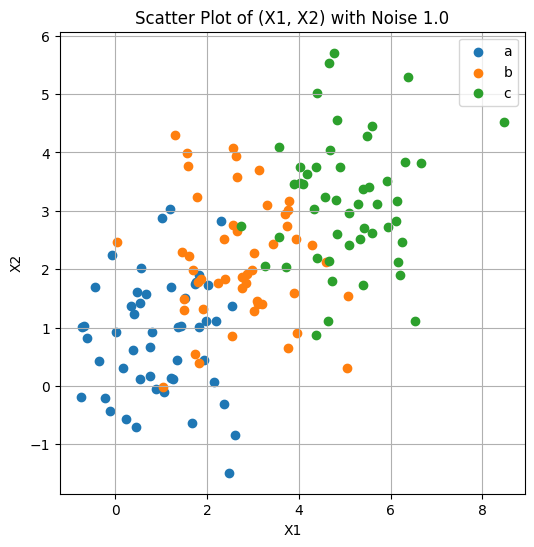

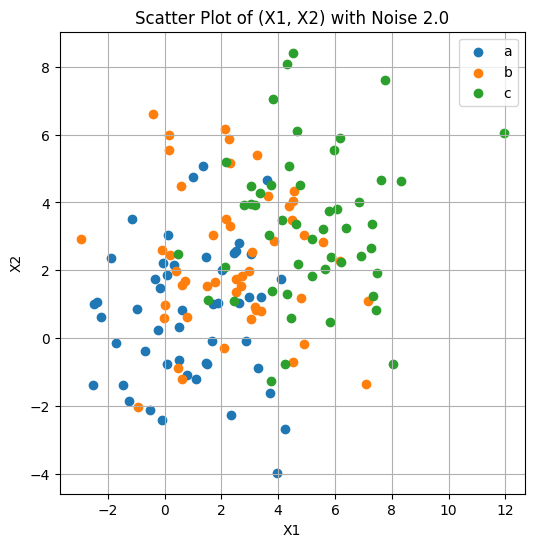

In [24]:
import matplotlib.pyplot as plt

def plot_clusters(df, noise):
    plt.figure(figsize=(6, 6))
    for group in df['group'].unique():
        subset = df[df['group'] == group]
        plt.scatter(subset['x1'], subset['x2'], label=group)

    #Moved plt.title and other formatting elements inside the function
    plt.title(f"Scatter Plot of (X1, X2) with Noise {noise}")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()
#Scatterplots
plot_clusters(df0_125, "0.125")
plot_clusters(df0_25, "0.25")
plot_clusters(df0_5, "0.5")
plot_clusters(df1_0, "1.0")
plot_clusters(df2_0, "2.0")

As the noise (noisiness of the data) goes up from 0.125 to 2.0, the visual distinctness of the clusters becomes less distinct.

3.

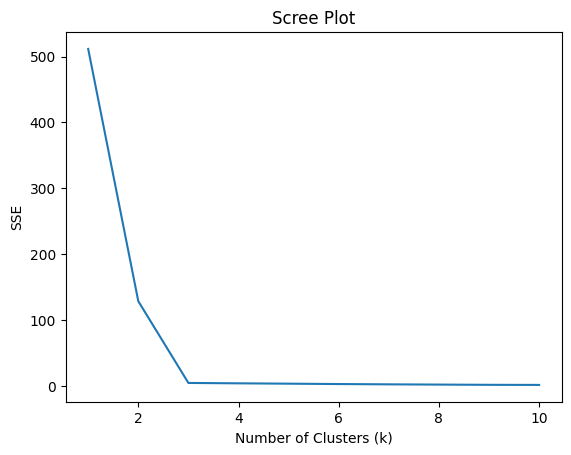

In [34]:
from sklearn.cluster import KMeans
import seaborn as sns

df = createData(0.125)

X = df[['x1', 'x2']].values

#Calculate the Sum of Squared Errors (SSE) for different values of k
k_bar = 10
SSE = []  #To store the sum of squared errors (training error) for each k

#Calculate SSE for k values from 1 to k_bar
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)  #Create a model for k
    model.fit(X)  #Fit the model to the data
    SSE.append(model.inertia_)  #Record the sum of squared error for k in the SSE vector

#Scree plot
scree_plot=sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE)  #Plot the SSE vs number of clusters
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

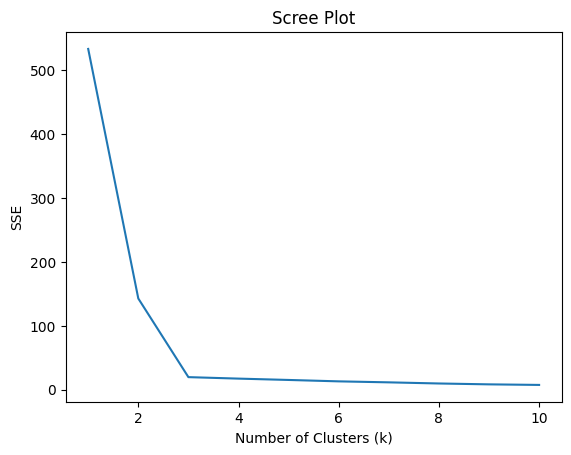

In [35]:
df = createData(0.25)

X = df[['x1', 'x2']].values

#Calculate the Sum of Squared Errors (SSE) for different values of k
k_bar = 10
SSE = []  #To store the sum of squared errors (training error) for each k

#Calculate SSE for k values from 1 to k_bar
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)  #Create a model for k
    model.fit(X)  #Fit the model to the data
    SSE.append(model.inertia_)  #Record the sum of squared error for k in the SSE vector

#Scree plot
scree_plot=sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE)  #Plot the SSE vs number of clusters
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

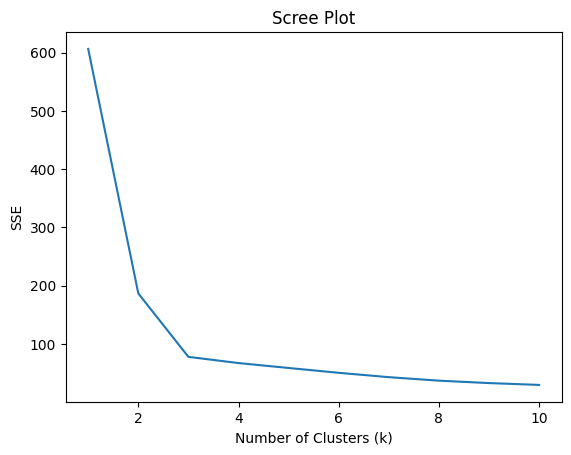

In [36]:
df = createData(0.5)

X = df[['x1', 'x2']].values

#Calculate the Sum of Squared Errors (SSE) for different values of k
k_bar = 10
SSE = []  #To store the sum of squared errors (training error) for each k

#Calculate SSE for k values from 1 to k_bar
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)  #Create a model for k
    model.fit(X)  #Fit the model to the data
    SSE.append(model.inertia_)  #Record the sum of squared error for k in the SSE vector

#Scree plot
scree_plot=sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE)  #Plot the SSE vs number of clusters
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

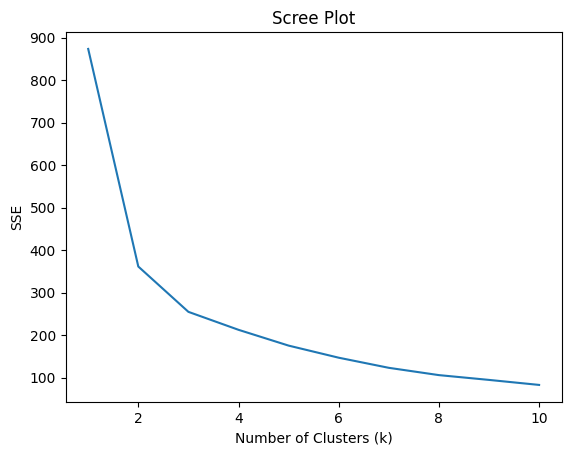

In [38]:
df = createData(1)

X = df[['x1', 'x2']].values

#Calculate the Sum of Squared Errors (SSE) for different values of k
k_bar = 10
SSE = []  #To store the sum of squared errors (training error) for each k

#Calculate SSE for k values from 1 to k_bar
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)  #Create a model for k
    model.fit(X)  #Fit the model to the data
    SSE.append(model.inertia_)  #Record the sum of squared error for k in the SSE vector

#Scree plot
scree_plot=sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE)  #Plot the SSE vs number of clusters
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

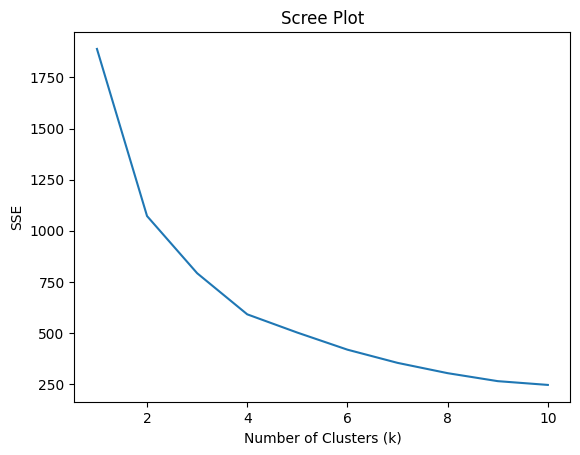

In [37]:
df = createData(2)

X = df[['x1', 'x2']].values

#Calculate the Sum of Squared Errors (SSE) for different values of k
k_bar = 10
SSE = []  #To store the sum of squared errors (training error) for each k

#Calculate SSE for k values from 1 to k_bar
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)  #Create a model for k
    model.fit(X)  #Fit the model to the data
    SSE.append(model.inertia_)  #Record the sum of squared error for k in the SSE vector

#Scree plot
scree_plot=sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE)  #Plot the SSE vs number of clusters
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

The level of noise affects the scree plot because with lower k values there will be a more apparent/sharp drop in SSE as the k increases. When k values are high, there is a more gradual decline/less of a sharp drop in SSE as k increases.

4.

The intuition of the elbow is to represent a point where adding more clusters doesn't reduce the SSE significantly and that adding more clusters doesn't neccessarily provide a meaningful improvement in the clustering quality.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?

1.

In [1]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

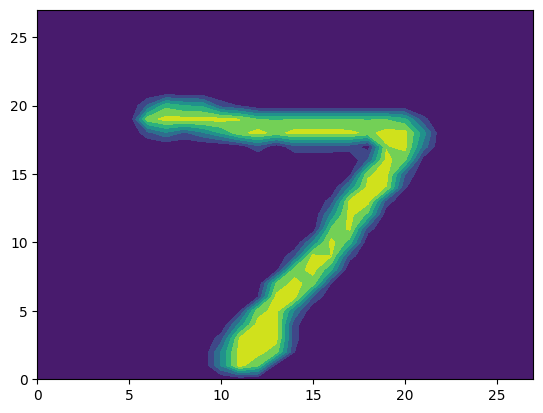

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

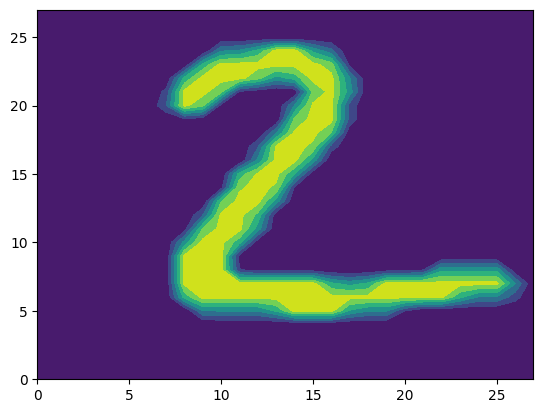

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

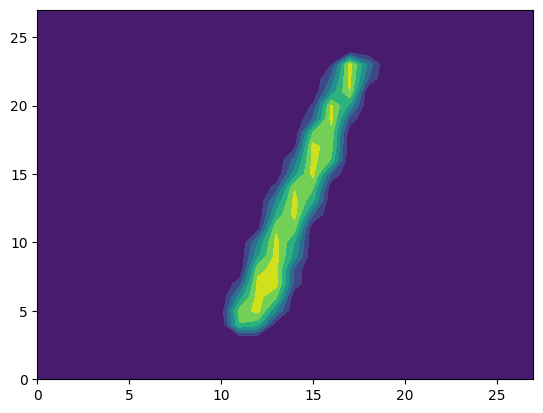

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

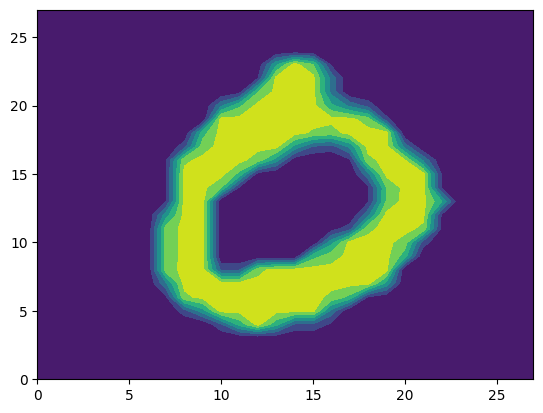

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

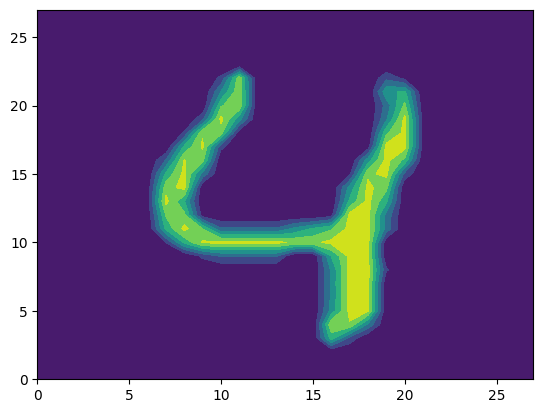

In [18]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()

2.

In [3]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)
print(X_test[0].shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


3.

In [4]:
import pandas as pd

In [5]:
X_train_reshaped = X_train.reshape(X_train.shape[0], 28*28)
X_test_reshaped = X_test.reshape(X_test.shape[0], 28*28)

4.

In [39]:
from sklearn.cluster import KMeans #Import kmc
model = KMeans(n_clusters=10,random_state=0) #Pass centroids and options into the model
model = model.fit(X_test_reshaped) #Initialize a kmc model
model

KMeans(n_clusters=10, random_state=0)

5.

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
cluster_assignments = model.predict(X_test_reshaped)

In [51]:
cross_tabulate = pd.crosstab(y_test, cluster_assignments, rownames=['True Label'], colnames=['Cluster'])
cross_tabulate

Cluster,0,1,2,3,4,5,6,7,8,9
True Label,,,,,,,,,,
0,55,1,2,23,16,5,813,0,3,62
1,3,478,0,2,0,0,0,651,0,1
2,60,119,10,22,15,691,15,50,27,23
3,678,2,13,6,11,48,4,63,7,178
4,0,14,253,18,276,3,1,24,392,1
5,283,26,31,12,144,6,6,35,30,319
6,2,9,2,782,3,18,21,50,26,45
7,0,46,456,0,380,10,1,33,101,1
8,200,39,32,7,70,11,7,31,18,559


In [58]:
correctly_clustered = np.trace(cross_tabulate)  #Sum of diagonal elements
total_digits = len(y_test)
proportion = correctly_clustered / total_digits * 100
proportion

9.16

9.16% of digits are clustered correctly. This doesn't appear to be that great of a correspondence.

It seems the digits that were hardest to distinguish from one another are 7 for 1, 9 for 2, 2 for 5, 8 for 9, 3 for 0.

In terms of if $k$MC can recover the latent digits 0 to 9, without even knowing what those digits were, it's plausible the clustering algorithm won't necessarily recover the true labels, however post-clustering analysis could help associate the clusters with the correct digits.

6.

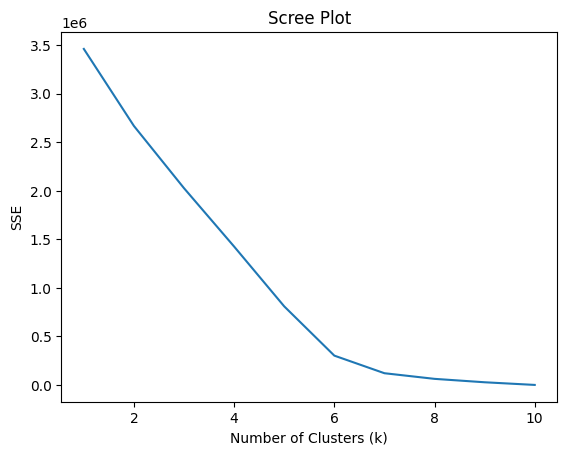

In [60]:
df = cross_tabulate

#Calculate the Sum of Squared Errors (SSE) for different values of k
k_bar = 10
SSE = []  #To store the sum of squared errors (training error) for each k

#Calculate SSE for k values from 1 to k_bar
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)  #Create a model for k
    model.fit(df)  #Fit the model to the data
    SSE.append(model.inertia_)  #Record the sum of squared error for k in the SSE vector

#Scree plot
scree_plot=sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE)  #Plot the SSE vs number of clusters
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

This scree plot fails to pick k=10. There is no clear elbow at k = 10. This means that the optimal k chosen is probably lower than 10. Given that there's k-means clusters fewer than 10 groups, it can be said to merge visually or structurally similar digits such as 3 and 8 or 4 and 9 into the same classification.